In [1]:
import torch
from torch import diag

assert torch.cuda.is_available()
dvc = "cuda"

# Matrix Rank Factorization
Lets assume that we have a matrix $M \in \mathcal{R}^{n \times n}$, that has some underlying structure. To represent this structure, let $M$ be the result of multiplying two smaller matrices with rank $d$, where $d \ll n$: $$M = AB$$ where $A \in \mathcal{R}^{n \times d}$, and $B \in \mathcal{R}^{d \times n}$.

In [2]:
n = 10_000
d_ = 1_000
A_ = torch.randn((n, d_)).to(dvc)
B_ = torch.randn((d_, n)).to(dvc)
M = A_ @ B_

In [3]:
def factorize(M, dim: int):
    """factorize matrix M into matrices A,B such that AB ~= M"""
    print(f"factorizing (randomized) for d={dim}")
    U, s, V = torch.svd_lowrank(M, q=dim)
    return U @ diag(s), V.T

def loss(x1, x2):
    return torch.norm(x1 - x2)

In [4]:
A, B = factorize(M, dim=150)

factorizing (randomized) for d=150


In [5]:
ds = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 950, 975, 1_000]
losses = []
for d in ds:
    A, B = factorize(M, dim=d)
    losses.append(loss(A @ B, M).item())

factorizing (randomized) for d=1
factorizing (randomized) for d=10
factorizing (randomized) for d=100
factorizing (randomized) for d=200
factorizing (randomized) for d=300
factorizing (randomized) for d=400
factorizing (randomized) for d=500
factorizing (randomized) for d=600
factorizing (randomized) for d=700
factorizing (randomized) for d=800
factorizing (randomized) for d=900
factorizing (randomized) for d=950
factorizing (randomized) for d=975
factorizing (randomized) for d=1000


In [6]:
import matplotlib.pyplot as plt

# Loss by Dimensions of d
Interestingly, we see that the error $|| AB - M||$ drops linearly with increasing $d$. I would have expected diminishing returns with more dimensions, i.e. that increasing the dimension $d$ by $k$ would reduce the error more than the next increase by $k$. However, that is not the case. This could be an artifact of the data generation process, which is based on random normal numbers.

Text(0.5, 0, 'Dimension of d')

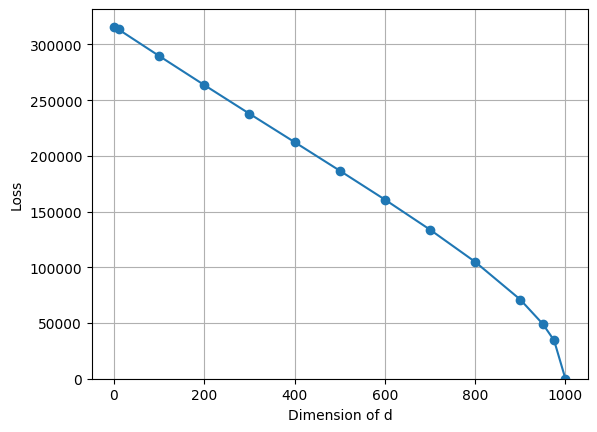

In [7]:
plt.plot(ds, losses, marker="o")
plt.grid()
plt.ylim((0, None))
plt.ylabel("Loss")
plt.xlabel("Dimension of d")

The final loss is probably only the sum of $n \times n$ numerical precision errors.

In [13]:
losses[-1] / n**2

8.795504760742188e-07